In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean, std, absolute
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Generate a regression dataset (Replace this with your actual data)
data = pd.read_csv('/content/drive/Shareddrives/RFID_23-24/3.1 Final Setup/dataset/condensed_data_all.csv')

predict = ['x','y']
X = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the model
model = LinearRegression()

# Fit the model
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate R squared on training set
y_train_pred = model.predict(x_train)
print('R squared on training set:', r2_score(y_train, y_train_pred))

# Define the evaluation procedure (Repeated K-Fold)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)  # Convert scores to positive

# Summarize performance
print('MSE with Cross-Validation: Mean=%.3f (STD=%.3f)' % (mean(n_scores), std(n_scores)))

# Calculate mean absolute error, mean squared error, and root mean squared error
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Print the evaluation metrics
print(f'MAE with test data: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Print the model accuracy on the test set
acc = model.score(x_test, y_test)
print(f'Accuracy on test data: {acc}')


R squared on training set: 0.2922398896963679
MSE with Cross-Validation: Mean=7.623 (STD=1.863)
MAE with test data: 2.198638940388186
MSE: 7.021406881230462
RMSE: 2.6459441407039104
Accuracy on test data: 0.19478122642280293


In [5]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == y_test[i][0] and predictions[i][1] == y_test[i][1]):
        over_lap.append(predictions[i])
over_lap

[]

<ipython-input-6-2c7ef021349d>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

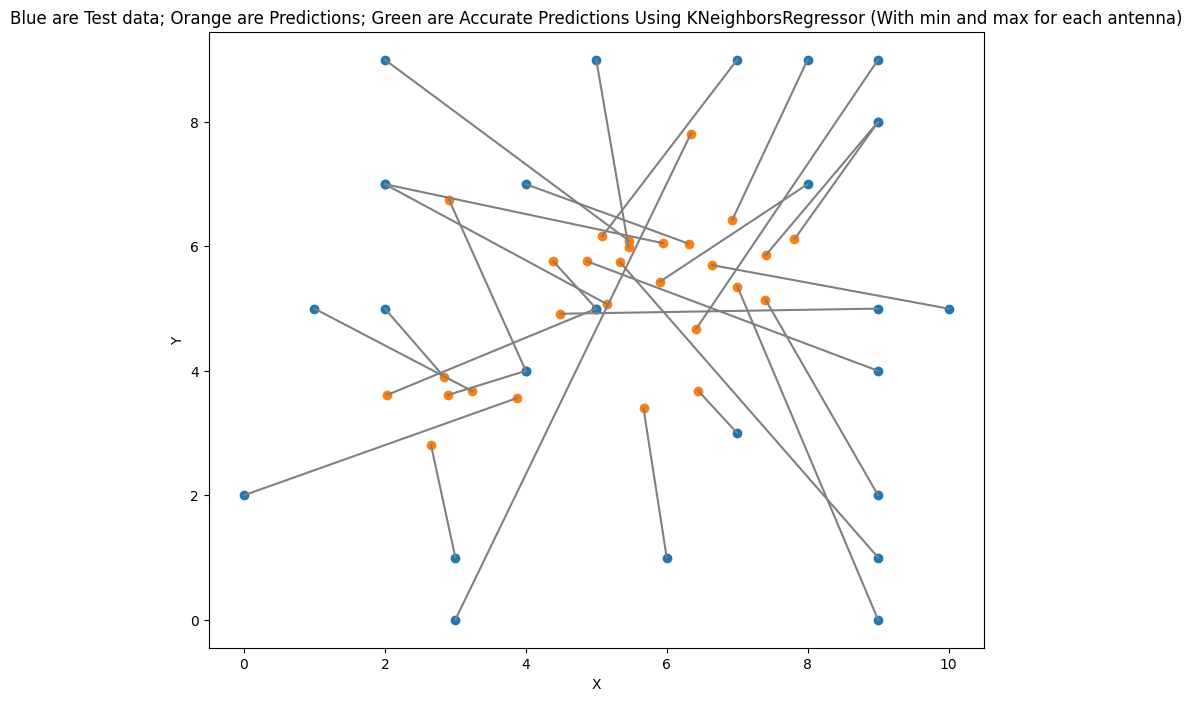

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
# plt.scatter(*zip(*over_lap))
for i in range(0, len(y_test)):
    # if (y_test[i][0] == predictions[i][0] and y_test[i][1] == predictions[i][1]) :
    #     plt.plot(predictions[i])
    # else:
    plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')